# Generate Data

A lot of times data is not readily available. But if we understand the anticipated schema of the data, we can generate them to complete the process before touching the real deal.

In [1]:
from mimesis import Generic, locales
from mimesis.enums import Algorithm

g = Generic(locales.EN_CA)

# generate a pool of device IDs
device_ids = []
for _ in range(50_000):
    device_ids.append(g.cryptographic.hash(Algorithm.SHA1))

device_ids[:10]

['cbbdceac328eca47ba17e08252ad6c3f422f95d6',
 'c6a39cdcbccb8a7fedb1de80b216828b59e963ed',
 '03a08a983c7b85dce2af911d5287062b3510b633',
 '644e082aaf070c681aa9be4b2c4595dbf9101571',
 'b565ccc09a82d7939c1bbf330c2ccf41b04f8231',
 '6fd0ce6ca1671dc4e24be27e4bb478bb8311e766',
 'd076f149c6ed1c92d10f25e273e2ab8f486c62e2',
 '579a0d36bf0bc743072073aafc919221cd2ebc33',
 'a65168cb070352744b86943939abf533fddd39eb',
 'be22801555939ab356438da8bf0f7504770df192']

In [2]:
import random

import pandas as pd

pois = []

for _ in range(13):
    brand = g.business.company()

    for _ in range(random.randint(14, 715)):
        pois.append({
            'name': brand,
            'address': g.address.address(),
            'city': g.address.city(),
            'region': g.address.region(abbr=True).split('-')[-1],
            'country': 'CA',
        })

pois = pd.DataFrame(pois)
pois

,name,address,city,region,country
0,Country Style,555 Thomas Way,Apache Junction,NL,CA
1,Country Style,314 Rockingham Avenue,Opelousas,PE,CA
2,Country Style,1241 Leblond Av,Mineral Wells,QC,CA
3,Country Style,276 Blackheath Av,Searcy,NL,CA
4,Country Style,60 Cote Avenue,Grove City,YT,CA
...,...,...,...,...,...
4959,Black Hen Music,1216 Shawinigan Av,Madison Heights,NT,CA
4960,Black Hen Music,38 Buckles Av,Redmond,NB,CA
4961,Black Hen Music,327 Bideford St,Rockville Centre,QC,CA
4962,Black Hen Music,868 Norice Alley,Lincoln Park,PE,CA


In [3]:
%%time

audiences = []
for row in pois.itertuples():
    # generate hourly date range for a week
    for dt in pd.date_range(start='2021-05-01', end='2021-05-31', freq='H'):
        if dt.strftime('%A') in ['Saturday', 'Sunday']:
            continue

        if dt.strftime('%-H') not in [str(i) for i in range(9, 22)]:
            continue

        _ids = random.sample(device_ids, random.randint(1, 5))
        audiences.append({
            'total_counts': len(_ids),
            'device_ids': _ids,
            'hour': dt.strftime('%H'),
            'day': dt.strftime('%A'),
            'date': dt.strftime('%Y%m%d'),
            'name': row.name,
            'address': row.address,
            'city': row.city,
            'region': row.region,
            'country': row.country,
        })

CPU times: user 53.2 s, sys: 602 ms, total: 53.8 s
Wall time: 54 s


In [4]:
df = pd.DataFrame(audiences)
df

,total_counts,device_ids,hour,day,date,name,address,city,region,country
0,2,"[54646ff36ea168d15346df0dd9a206654ab3b37d, d41...",09,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
1,3,"[b771333563546581527190d74f93a6d77c2ade80, 558...",10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
2,5,"[0d873c5ceee2722bbb397aa09dd7a72bcc7ae4b5, 97a...",11,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
3,5,"[8a8c06a7f8dfabd35c3c9a8c4188d939a5bc95f1, a0b...",12,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
4,2,"[abf9c8f27cffec0a79d99bbcf7a14f36ade9c1e4, ae8...",13,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
...,...,...,...,...,...,...,...,...,...,...
1290635,4,"[1a59635b5efcc484ffb700198e636be644fea559, 686...",17,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
1290636,2,"[0f49167bf9dbf1710b24f92b6fd539ec5e43b892, 2ea...",18,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
1290637,2,"[ebfc6cee24e475f10692ba470012bb6bd0d581fc, 674...",19,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
1290638,3,"[6c4a7a0b2601dfa52fdf4bf2f6211b7d5090ec8d, a3f...",20,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA


In [5]:
df.total_counts.describe()  # a probable indicator of generated data

count    1.290640e+06
mean     3.000683e+00
std      1.414087e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: total_counts, dtype: float64

In [6]:
exp = df.explode('device_ids').drop('total_counts', axis=1).reset_index(drop=True)
exp

,device_ids,hour,day,date,name,address,city,region,country
0,54646ff36ea168d15346df0dd9a206654ab3b37d,09,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
1,d41fd48e2b97648f2d1fdbea9699487e955d60d6,09,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
2,b771333563546581527190d74f93a6d77c2ade80,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
3,558307b98545eed8f54a9ab4e5aee897be6bde69,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
4,29a23fc52428fe0aca691805b8685b2d0e3161ed,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
...,...,...,...,...,...,...,...,...,...
3872796,19b6e8134774eac4816bc63ecf821e1b856589af,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872797,266e4d08ea7f924693e5a72b7b6d378c00f9f87e,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872798,6394db8ced8710e493d5a877917fd376f91f73f1,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872799,b4bfe64a9d3e9e50299d81a54cbbba71e25b9882,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA


In [7]:
dedupe = exp.drop_duplicates(subset=['device_ids', 'day', 'hour', 'date'], keep='last')  # get rid of ppl with TARDIS
dedupe

,device_ids,hour,day,date,name,address,city,region,country
1,d41fd48e2b97648f2d1fdbea9699487e955d60d6,09,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
2,b771333563546581527190d74f93a6d77c2ade80,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
3,558307b98545eed8f54a9ab4e5aee897be6bde69,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
4,29a23fc52428fe0aca691805b8685b2d0e3161ed,10,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
5,0d873c5ceee2722bbb397aa09dd7a72bcc7ae4b5,11,Monday,20210503,Country Style,555 Thomas Way,Apache Junction,NL,CA
...,...,...,...,...,...,...,...,...,...
3872796,19b6e8134774eac4816bc63ecf821e1b856589af,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872797,266e4d08ea7f924693e5a72b7b6d378c00f9f87e,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872798,6394db8ced8710e493d5a877917fd376f91f73f1,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA
3872799,b4bfe64a9d3e9e50299d81a54cbbba71e25b9882,21,Friday,20210528,Black Hen Music,434 Chattaway Av,Duluth,ON,CA


In [8]:
from pandas.api.types import CategoricalDtype

wkds = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)
dedupe = dedupe.copy()
dedupe['day'] = dedupe['day'].astype(wkds)

In [9]:
gb = dedupe.groupby(['name', 'day', 'hour'], as_index=False).agg({'device_ids': 'count'})
gb

,name,day,hour,device_ids
0,Atmosphere Visual Effects,Monday,09,7173
1,Atmosphere Visual Effects,Monday,10,7103
2,Atmosphere Visual Effects,Monday,11,6973
3,Atmosphere Visual Effects,Monday,12,7147
4,Atmosphere Visual Effects,Monday,13,6977
...,...,...,...,...
775,La Capitale,Friday,17,4181
776,La Capitale,Friday,18,4120
777,La Capitale,Friday,19,4123
778,La Capitale,Friday,20,4156


In [10]:
names = gb['name'].unique().tolist()
name = random.choice(names)
name

'Atmosphere Visual Effects'

In [11]:
pv = gb[gb['name'] == name].pivot('day', 'hour', 'device_ids')
pv

hour,09,10,11,12,13,14,15,16,17,18,19,20,21
day,,,,,,,,,,,,,
Monday,7173,7103,6973,7147,6977,6965,7149,7072,7066,7149,7051,7131,7012
Tuesday,7032,7149,7115,7053,7073,7201,7079,7073,7213,7213,7055,7123,7203
Wednesday,7120,7129,7169,7168,7142,7063,7149,6973,7116,7084,7193,7208,7055
Thursday,6929,7210,7117,7122,7216,7039,7127,7132,7318,7109,7114,7172,7079
Friday,6985,7102,7103,7072,7077,7165,6988,7015,7040,7184,7170,7015,7122


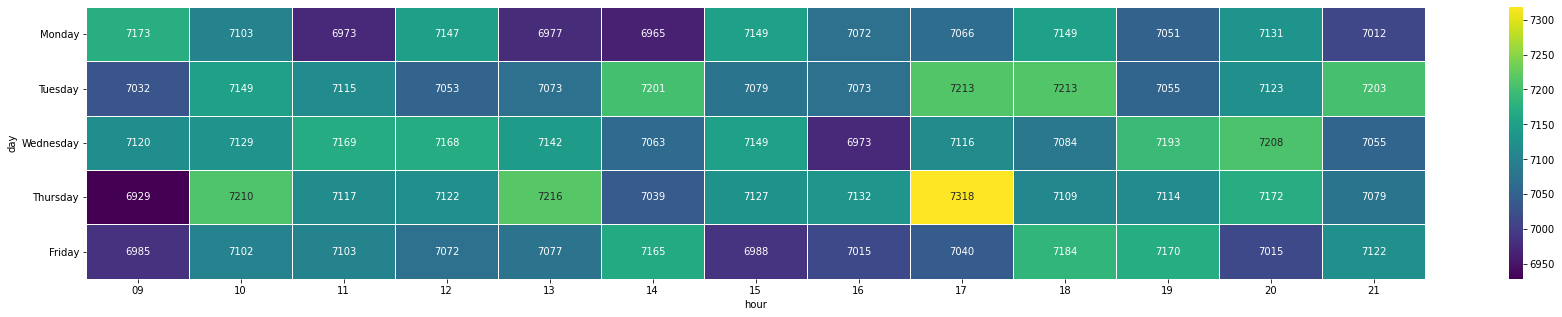

In [12]:
import matplotlib.pyplot as plot
import seaborn as sns

_, ax = plot.subplots(figsize=(30, 5))
heatmap = sns.heatmap(pv, annot=True, fmt='.0f', cmap='viridis', linecolor='white', linewidths='0.5', ax=ax)

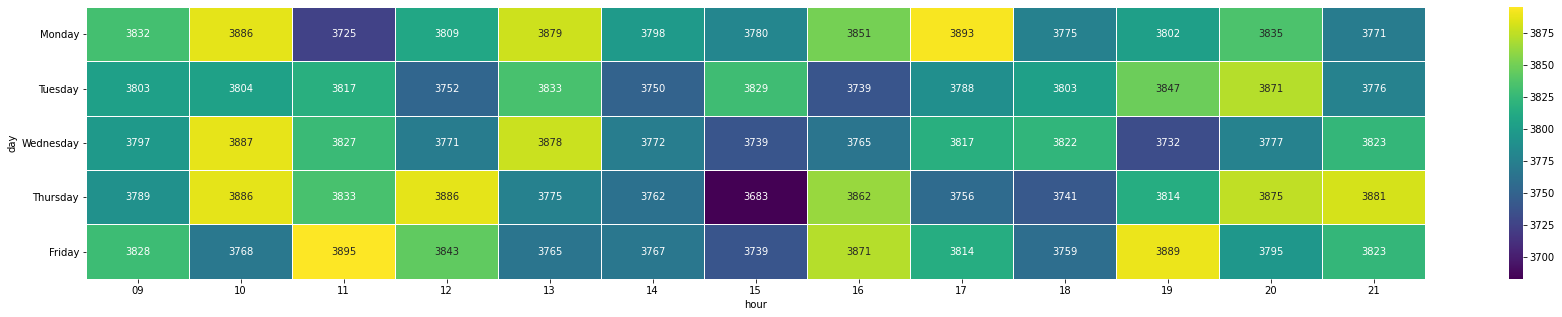

In [13]:
def heatmap(df, col, col_val):
    gb = df.groupby([col, 'day', 'hour'], as_index=False).agg({'device_ids': 'count'})
    pv = gb[gb[col] == col_val].pivot('day', 'hour', 'device_ids')
    _, ax = plot.subplots(figsize=(30, 5))
    h = sns.heatmap(pv, annot=True, fmt='.0f', cmap='viridis', linecolor='white', linewidths='0.5', ax=ax)


heatmap(dedupe, 'region', 'ON')

In [14]:
import ipywidgets as widgets


def heatmap_val(brand):
    return heatmap(dedupe, 'name', brand)

i = widgets.interact(heatmap_val, brand=dedupe.name.unique().tolist())

interactive(children=(Dropdown(description='brand', options=('Country Style', 'La Capitale', 'Donner Metals', …

In [15]:
def heatmap_col(col):

    def heatmap_val(val):
        return heatmap(dedupe, col, val)

    widgets.interact(heatmap_val, val=dedupe[col].unique().tolist())

i = widgets.interact(heatmap_col, col=['name', 'region', 'city'])

interactive(children=(Dropdown(description='col', options=('name', 'region', 'city'), value='name'), Output())…